##  Packages

In [1]:
using DynamicalSystems, CairoMakie,  DifferentialEquations, OrdinaryDiffEq

In [2]:
using StaticArrays

## non optimize system

In [2]:
function HR!(du, u, p, t)
    
    function sigma(x)
            return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
    end
    
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du[1] = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du[2] = c - d * x1 ^2 - y1
    du[3] = r * ( s * ( x1 - xr ) - z1 )
    
    du[4] = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du[5] = c - d * x2 ^2 - y2
    du[6] = r * ( s * ( x2 - xr ) - z2 )
    
    return SVector(du[1], du[2], du[3],
                    du[4], du[5], du[6])
end

HR! (generic function with 1 method)

In [3]:
tspan = (0., 100000.)

a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;
k1= -0.17; k2 = -0.17;
k = 0.

0.0

In [4]:
p = [a, b, c, d, s, xr, r, I, xv, k1, k2, k]
HR = ContinuousDynamicalSystem(HR!,  u0, p )

6-dimensional continuous dynamical system
 state:       [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
 rule f:      HR!
 in-place?    true
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, …, 4.0, 2.0, -0.17, -0.17, 0.0]

In [12]:
pvalues = range(0, stop = 1, length = 500)
i = 4
plane = (1, 0.0)
tf = 100000.0
p_index = 12

12

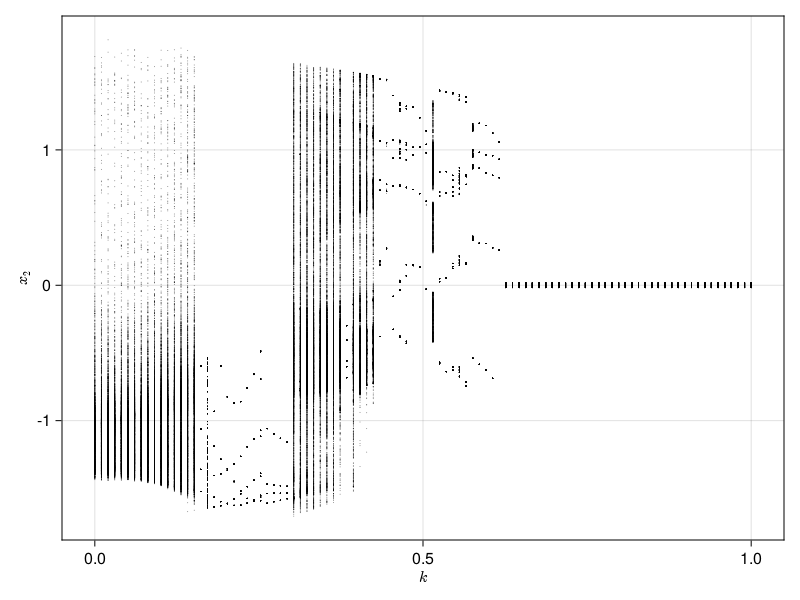

In [7]:
output = produce_orbitdiagram(HR, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = 50000.0;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                )

fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1
    )
end
fig

## Optimize system

In [3]:
function sigma(x)
    return @fastmath 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [4]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;
k1= -0.17; k2 = -0.17;
k = 0.54

condition1 = SA[-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
condition2 = SA[-0.5, -0.5, -0.5, -0.5, 0-0.5, -0.5]

p = SA[a, b, c, d,
        s, xr, r, I, xv, k1, k2, k]


p = [a, b, c, d, s, xr, r, I, xv, k1, k2, k]
ds_HR1 = ContinuousDynamicalSystem(HR,  condition1, p )
ds_HR2 = ContinuousDynamicalSystem(HR,  condition2, p );
ds_HR1

6-dimensional continuous dynamical system
 state:       [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, …, 4.0, 2.0, -0.17, -0.17, 0.54]

In [5]:
ds_HR2

6-dimensional continuous dynamical system
 state:       [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, …, 4.0, 2.0, -0.17, -0.17, 0.54]

In [6]:
tr = trajectory(ds_HR1, 100000, diffeq = (alg = AutoVern9(Rodas5()),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 10000000
                                                            ))

xsum = tr[:, 1] + tr[:, 4]
xsum = xsum[floor(Int, length(xsum) / 2):end ];
x1 = tr[:, 1]
y1 = tr[:, 2]
z1 = tr[:, 3];
x1 = x1[floor(Int, length(x1) / 2):end ];
y1 = y1[floor(Int, length(y1) / 2):end ];
z1 = z1[floor(Int, length(z1) / 2):end ];

In [7]:
tr1 = trajectory(ds_HR2, 100000, diffeq = (alg = AutoVern9(Rodas5()),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 10000000
                                                            ))

# xsum1 = tr1[:, 1] + tr1[:, 4]
# xsum1 = xsum1[floor(Int, length(xsum1) / 2):end ];
x11 = tr1[:, 1]
y11 = tr1[:, 2]
z11 = tr1[:, 3];
x11 = x11[floor(Int, length(x11) / 2):end ];
y11 = y11[floor(Int, length(y11) / 2):end ];
z11 = z11[floor(Int, length(z11) / 2):end ];

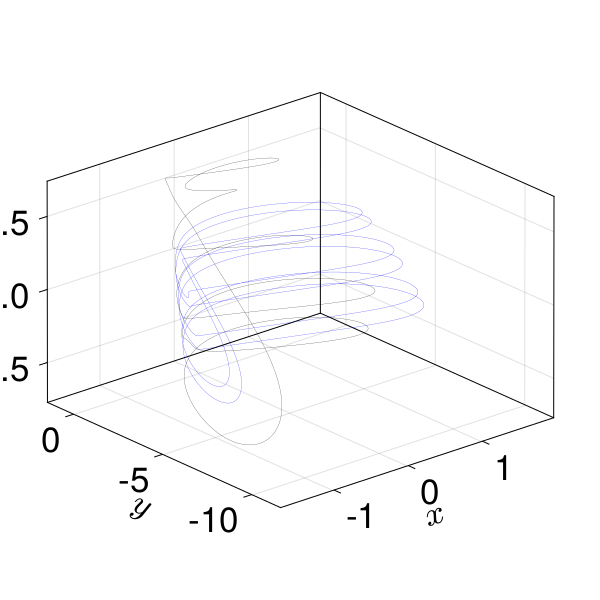

In [8]:
f = Figure(resolution = (600, 600), fontsize = 35)
ax = Axis3(f[1, 1], xlabel = L"x", ylabel = L"y", zlabel = L"z")
lines!(ax, x1, y1, z1, linewidth = 0.2, color = "black" )
lines!(ax, x11, y11, z11, linewidth = 0.2, color = "blue" )
f

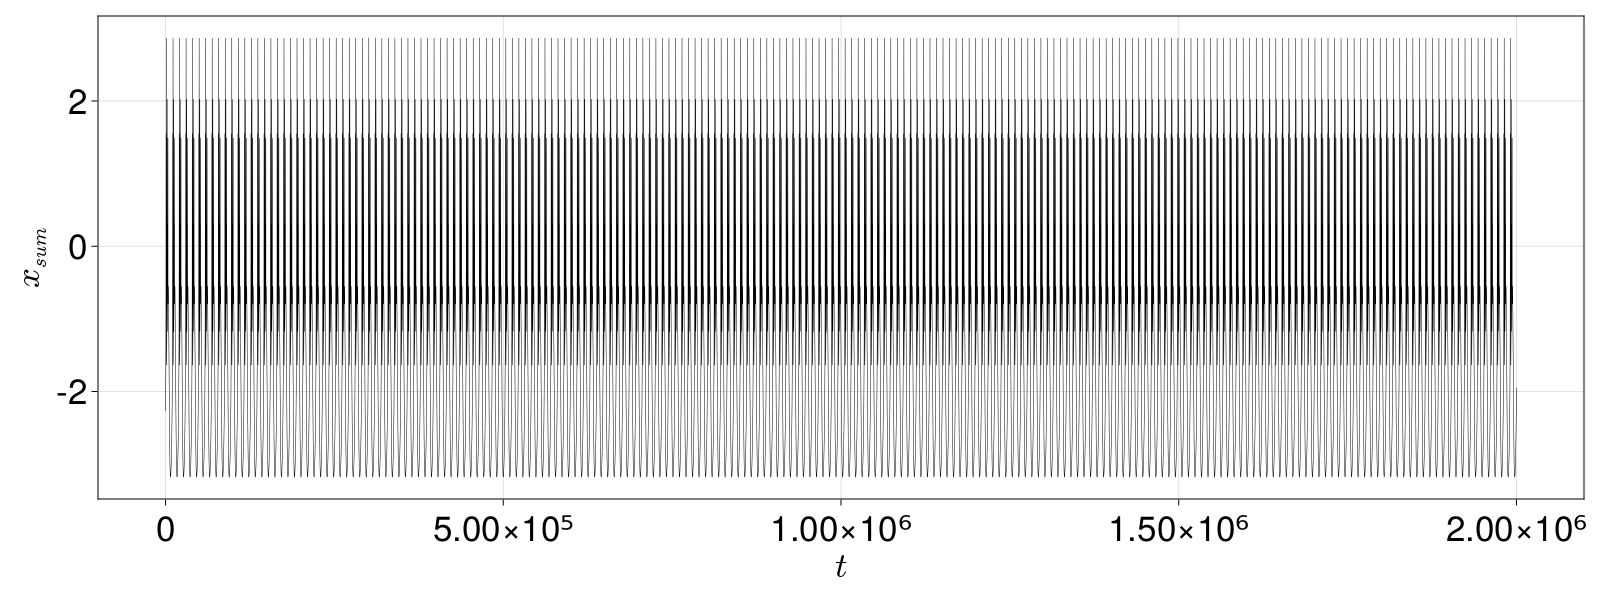

In [9]:
f = Figure(resolution = (1600, 600), fontsize = 35)
ax = Axis(f[1, 1], xlabel = L"t", ylabel = L"x_{sum}")
lines!(xsum[1:2000000], linewidth = 0.5, color = "black" )
f

┌ Warning: Direct propagation of keyword arguments to DifferentialEquations.jl is deprecated.
│ From now on pass any DiffEq-related keywords as a `NamedTuple` using the
│ explicit keyword `diffeq` instead.
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\PHPDF\src\orbitdiagrams\poincare.jl:106
┌ Warning: Direct propagation of keyword arguments to DifferentialEquations.jl is deprecated.
│ From now on pass any DiffEq-related keywords as a `NamedTuple` using the
│ explicit keyword `diffeq` instead.
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\PHPDF\src\orbitdiagrams\poincare.jl:106


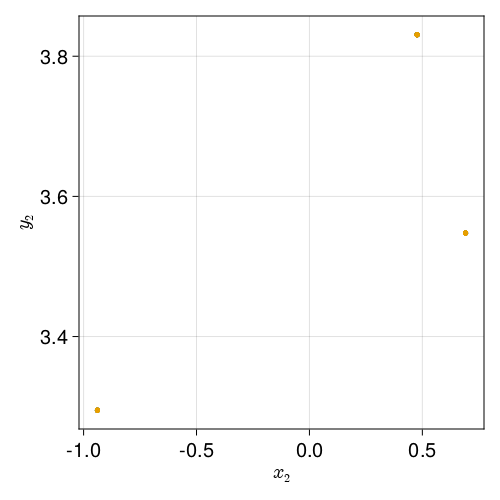

In [10]:
plane = (2, -4.0)
u0s = [
        [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0],
        [0.5, 0.2, 0.5, 0.5, 0.3, 0.5]
    ]


fig = Figure(resolution = (500,500), fontsize = 20)
ax1 = Axis(fig[1,1]; xlabel = L"x_2", ylabel = L"y_2")

for u0 in u0s
    psos = poincaresos(ds_HR1, plane,  n = 300000.0, Ttr  = 300000.0, u0 = u0;
                        diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000) )
    
    scatter!(ax1, psos[:, 1], psos[:, 3]; markersize = 5.0)
end
fig

## x1 = 0, plot k in x2 

In [51]:
ds = ds_HR1

pvalues = range(0.5, stop = 0.0, length = 10000)
i = 4
plane = (1, 0.0)
tf = 1000.0
tr = 5000.0
p_index = 12

12

In [52]:
output = produce_orbitdiagram(ds, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = tr, printparams = true;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

parameter = 0.5
parameter = 0.49994999499949994
parameter = 0.4998999899989999
parameter = 0.49984998499849986
parameter = 0.4997999799979998
parameter = 0.49974997499749974
parameter = 0.4996999699969997
parameter = 0.49964996499649966
parameter = 0.4995999599959996
parameter = 0.49954995499549953
parameter = 0.4994999499949995
parameter = 0.49944994499449946
parameter = 0.4993999399939994
parameter = 0.49934993499349933
parameter = 0.4992999299929993
parameter = 0.49924992499249926
parameter = 0.4991999199919992
parameter = 0.49914991499149913
parameter = 0.4990999099909991
parameter = 0.49904990499049906
parameter = 0.498999899989999
parameter = 0.49894989498949893
parameter = 0.4988998899889989
parameter = 0.49884988498849886
parameter = 0.4987998799879988
parameter = 0.49874987498749873
parameter = 0.4986998699869987
parameter = 0.49864986498649866
parameter = 0.4985998599859986
parameter = 0.49854985498549853
parameter = 0.4984998499849985
parameter = 0.49844984498449846
paramete

parameter = 0.4867986798679868
parameter = 0.48674867486748674
parameter = 0.4866986698669867
parameter = 0.48664866486648667
parameter = 0.4865986598659866
parameter = 0.48654865486548654
parameter = 0.4864986498649865
parameter = 0.48644864486448647
parameter = 0.4863986398639864
parameter = 0.48634863486348634
parameter = 0.4862986298629863
parameter = 0.48624862486248627
parameter = 0.4861986198619862
parameter = 0.48614861486148614
parameter = 0.4860986098609861
parameter = 0.48604860486048607
parameter = 0.485998599859986
parameter = 0.48594859485948594
parameter = 0.4858985898589859
parameter = 0.48584858485848587
parameter = 0.4857985798579858
parameter = 0.48574857485748574
parameter = 0.4856985698569857
parameter = 0.48564856485648566
parameter = 0.4855985598559856
parameter = 0.48554855485548554
parameter = 0.4854985498549855
parameter = 0.48544854485448546
parameter = 0.4853985398539854
parameter = 0.48534853485348534
parameter = 0.48529852985298527
parameter = 0.4852485248

parameter = 0.4736973697369737
parameter = 0.4736473647364737
parameter = 0.4735973597359736
parameter = 0.47354735473547355
parameter = 0.4734973497349735
parameter = 0.4734473447344735
parameter = 0.4733973397339734
parameter = 0.47334733473347335
parameter = 0.4732973297329733
parameter = 0.4732473247324733
parameter = 0.4731973197319732
parameter = 0.47314731473147315
parameter = 0.4730973097309731
parameter = 0.4730473047304731
parameter = 0.472997299729973
parameter = 0.47294729472947294
parameter = 0.4728972897289729
parameter = 0.47284728472847287
parameter = 0.4727972797279728
parameter = 0.47274727472747274
parameter = 0.4726972697269727
parameter = 0.47264726472647267
parameter = 0.4725972597259726
parameter = 0.47254725472547254
parameter = 0.4724972497249725
parameter = 0.47244724472447247
parameter = 0.4723972397239724
parameter = 0.47234723472347234
parameter = 0.4722972297229723
parameter = 0.47224722472247227
parameter = 0.4721972197219722
parameter = 0.472147214721472

parameter = 0.4606460646064606
parameter = 0.4605960596059606
parameter = 0.46054605460546055
parameter = 0.4604960496049605
parameter = 0.4604460446044604
parameter = 0.4603960396039604
parameter = 0.46034603460346035
parameter = 0.4602960296029603
parameter = 0.4602460246024602
parameter = 0.4601960196019602
parameter = 0.46014601460146015
parameter = 0.4600960096009601
parameter = 0.46004600460046
parameter = 0.45999599959996
parameter = 0.45994599459945995
parameter = 0.4598959895989599
parameter = 0.4598459845984598
parameter = 0.4597959795979598
parameter = 0.45974597459745975
parameter = 0.4596959695969597
parameter = 0.4596459645964596
parameter = 0.4595959595959596
parameter = 0.45954595459545955
parameter = 0.4594959495949595
parameter = 0.4594459445944594
parameter = 0.4593959395939594
parameter = 0.45934593459345935
parameter = 0.4592959295929593
parameter = 0.4592459245924592
parameter = 0.4591959195919592
parameter = 0.45914591459145915
parameter = 0.4590959095909591
para

parameter = 0.4474947494749475
parameter = 0.44744474447444743
parameter = 0.44739473947394737
parameter = 0.44734473447344736
parameter = 0.4472947294729473
parameter = 0.44724472447244723
parameter = 0.4471947194719472
parameter = 0.44714471447144716
parameter = 0.4470947094709471
parameter = 0.44704470447044703
parameter = 0.446994699469947
parameter = 0.44694469446944696
parameter = 0.4468946894689469
parameter = 0.44684468446844683
parameter = 0.4467946794679468
parameter = 0.44674467446744676
parameter = 0.4466946694669467
parameter = 0.44664466446644663
parameter = 0.4465946594659466
parameter = 0.44654465446544656
parameter = 0.4464946494649465
parameter = 0.4464446444644464
parameter = 0.4463946394639464
parameter = 0.44634463446344635
parameter = 0.4462946294629463
parameter = 0.4462446244624462
parameter = 0.4461946194619462
parameter = 0.44614461446144615
parameter = 0.4460946094609461
parameter = 0.446044604460446
parameter = 0.445994599459946
parameter = 0.445944594459445

parameter = 0.43444344434443444
parameter = 0.4343934393439344
parameter = 0.43434343434343436
parameter = 0.4342934293429343
parameter = 0.43424342434243424
parameter = 0.4341934193419342
parameter = 0.43414341434143416
parameter = 0.4340934093409341
parameter = 0.43404340434043404
parameter = 0.43399339933993397
parameter = 0.43394339433943396
parameter = 0.4338933893389339
parameter = 0.43384338433843384
parameter = 0.43379337933793377
parameter = 0.43374337433743376
parameter = 0.4336933693369337
parameter = 0.43364336433643363
parameter = 0.43359335933593357
parameter = 0.43354335433543356
parameter = 0.4334933493349335
parameter = 0.43344334433443343
parameter = 0.43339333933393337
parameter = 0.43334333433343336
parameter = 0.4332933293329333
parameter = 0.43324332433243323
parameter = 0.43319331933193317
parameter = 0.43314331433143316
parameter = 0.4330933093309331
parameter = 0.43304330433043303
parameter = 0.43299329932993297
parameter = 0.43294329432943296
parameter = 0.432

parameter = 0.4213421342134213
parameter = 0.4212921292129213
parameter = 0.42124212421242124
parameter = 0.4211921192119212
parameter = 0.4211421142114211
parameter = 0.4210921092109211
parameter = 0.42104210421042104
parameter = 0.420992099209921
parameter = 0.42094209420942097
parameter = 0.4208920892089209
parameter = 0.42084208420842084
parameter = 0.4207920792079208
parameter = 0.42074207420742077
parameter = 0.4206920692069207
parameter = 0.42064206420642064
parameter = 0.4205920592059206
parameter = 0.42054205420542057
parameter = 0.4204920492049205
parameter = 0.42044204420442044
parameter = 0.4203920392039204
parameter = 0.42034203420342037
parameter = 0.4202920292029203
parameter = 0.42024202420242024
parameter = 0.4201920192019202
parameter = 0.42014201420142017
parameter = 0.4200920092009201
parameter = 0.42004200420042004
parameter = 0.41999199919992
parameter = 0.41994199419941997
parameter = 0.4198919891989199
parameter = 0.41984198419841984
parameter = 0.41979197919791

parameter = 0.4082908290829083
parameter = 0.40824082408240825
parameter = 0.4081908190819082
parameter = 0.4081408140814081
parameter = 0.4080908090809081
parameter = 0.40804080408040805
parameter = 0.407990799079908
parameter = 0.4079407940794079
parameter = 0.4078907890789079
parameter = 0.40784078407840785
parameter = 0.4077907790779078
parameter = 0.4077407740774077
parameter = 0.4076907690769077
parameter = 0.40764076407640765
parameter = 0.4075907590759076
parameter = 0.4075407540754075
parameter = 0.4074907490749075
parameter = 0.40744074407440745
parameter = 0.4073907390739074
parameter = 0.4073407340734073
parameter = 0.4072907290729073
parameter = 0.40724072407240725
parameter = 0.4071907190719072
parameter = 0.4071407140714071
parameter = 0.4070907090709071
parameter = 0.40704070407040704
parameter = 0.406990699069907
parameter = 0.4069406940694069
parameter = 0.4068906890689069
parameter = 0.40684068406840684
parameter = 0.4067906790679068
parameter = 0.4067406740674067
pa

parameter = 0.3951895189518952
parameter = 0.3951395139513951
parameter = 0.39508950895089506
parameter = 0.39503950395039505
parameter = 0.394989498949895
parameter = 0.3949394939493949
parameter = 0.39488948894889486
parameter = 0.39483948394839485
parameter = 0.3947894789478948
parameter = 0.3947394739473947
parameter = 0.3946894689468947
parameter = 0.39463946394639465
parameter = 0.3945894589458946
parameter = 0.3945394539453945
parameter = 0.3944894489448945
parameter = 0.39443944394439445
parameter = 0.3943894389438944
parameter = 0.3943394339433943
parameter = 0.3942894289428943
parameter = 0.39423942394239425
parameter = 0.3941894189418942
parameter = 0.3941394139413941
parameter = 0.3940894089408941
parameter = 0.39403940394039405
parameter = 0.393989398939894
parameter = 0.3939393939393939
parameter = 0.3938893889388939
parameter = 0.39383938393839385
parameter = 0.3937893789378938
parameter = 0.3937393739373937
parameter = 0.3936893689368937
parameter = 0.39363936393639365


parameter = 0.38213821382138213
parameter = 0.38208820882088207
parameter = 0.38203820382038206
parameter = 0.381988198819882
parameter = 0.38193819381938193
parameter = 0.38188818881888187
parameter = 0.38183818381838186
parameter = 0.3817881788178818
parameter = 0.38173817381738173
parameter = 0.38168816881688167
parameter = 0.38163816381638166
parameter = 0.3815881588158816
parameter = 0.38153815381538153
parameter = 0.38148814881488147
parameter = 0.38143814381438146
parameter = 0.3813881388138814
parameter = 0.38133813381338133
parameter = 0.38128812881288127
parameter = 0.38123812381238126
parameter = 0.3811881188118812
parameter = 0.38113811381138113
parameter = 0.38108810881088107
parameter = 0.38103810381038106
parameter = 0.380988098809881
parameter = 0.38093809380938093
parameter = 0.38088808880888086
parameter = 0.38083808380838086
parameter = 0.3807880788078808
parameter = 0.38073807380738073
parameter = 0.38068806880688066
parameter = 0.38063806380638066
parameter = 0.380

parameter = 0.368986898689869
parameter = 0.36893689368936894
parameter = 0.3688868886888689
parameter = 0.3688368836883688
parameter = 0.3687868786878688
parameter = 0.36873687368736874
parameter = 0.3686868686868687
parameter = 0.3686368636863686
parameter = 0.3685868586858686
parameter = 0.36853685368536854
parameter = 0.3684868486848685
parameter = 0.3684368436843684
parameter = 0.3683868386838684
parameter = 0.36833683368336834
parameter = 0.3682868286828683
parameter = 0.36823682368236826
parameter = 0.3681868186818682
parameter = 0.36813681368136814
parameter = 0.36808680868086807
parameter = 0.36803680368036806
parameter = 0.367986798679868
parameter = 0.36793679367936794
parameter = 0.36788678867886787
parameter = 0.36783678367836786
parameter = 0.3677867786778678
parameter = 0.36773677367736773
parameter = 0.36768676867686767
parameter = 0.36763676367636766
parameter = 0.3675867586758676
parameter = 0.36753675367536753
parameter = 0.36748674867486747
parameter = 0.36743674367

parameter = 0.3558855885588559
parameter = 0.3558355835583558
parameter = 0.3557855785578558
parameter = 0.35573557355735574
parameter = 0.3556855685568557
parameter = 0.3556355635563556
parameter = 0.3555855585558556
parameter = 0.35553555355535554
parameter = 0.3554855485548555
parameter = 0.3554355435543554
parameter = 0.3553855385538554
parameter = 0.35533553355335534
parameter = 0.3552855285528553
parameter = 0.3552355235523552
parameter = 0.3551855185518552
parameter = 0.35513551355135514
parameter = 0.3550855085508551
parameter = 0.355035503550355
parameter = 0.354985498549855
parameter = 0.35493549354935494
parameter = 0.3548854885488549
parameter = 0.3548354835483548
parameter = 0.3547854785478548
parameter = 0.35473547354735474
parameter = 0.3546854685468547
parameter = 0.3546354635463546
parameter = 0.3545854585458546
parameter = 0.35453545354535454
parameter = 0.3544854485448545
parameter = 0.3544354435443544
parameter = 0.3543854385438544
parameter = 0.35433543354335434
pa

parameter = 0.3428342834283428
parameter = 0.34278427842784276
parameter = 0.34273427342734275
parameter = 0.3426842684268427
parameter = 0.3426342634263426
parameter = 0.34258425842584256
parameter = 0.34253425342534255
parameter = 0.3424842484248425
parameter = 0.3424342434243424
parameter = 0.34238423842384236
parameter = 0.34233423342334235
parameter = 0.3422842284228423
parameter = 0.3422342234223422
parameter = 0.34218421842184216
parameter = 0.34213421342134215
parameter = 0.3420842084208421
parameter = 0.342034203420342
parameter = 0.341984198419842
parameter = 0.34193419341934195
parameter = 0.3418841884188419
parameter = 0.3418341834183418
parameter = 0.3417841784178418
parameter = 0.34173417341734175
parameter = 0.3416841684168417
parameter = 0.3416341634163416
parameter = 0.3415841584158416
parameter = 0.34153415341534155
parameter = 0.3414841484148415
parameter = 0.3414341434143414
parameter = 0.3413841384138414
parameter = 0.34133413341334135
parameter = 0.341284128412841

parameter = 0.32973297329732976
parameter = 0.3296829682968297
parameter = 0.32963296329632963
parameter = 0.32958295829582956
parameter = 0.32953295329532956
parameter = 0.3294829482948295
parameter = 0.32943294329432943
parameter = 0.32938293829382936
parameter = 0.32933293329332936
parameter = 0.3292829282928293
parameter = 0.3292329232923292
parameter = 0.32918291829182916
parameter = 0.32913291329132915
parameter = 0.3290829082908291
parameter = 0.329032903290329
parameter = 0.32898289828982896
parameter = 0.32893289328932895
parameter = 0.3288828882888289
parameter = 0.3288328832883288
parameter = 0.32878287828782876
parameter = 0.32873287328732875
parameter = 0.3286828682868287
parameter = 0.3286328632863286
parameter = 0.32858285828582856
parameter = 0.32853285328532855
parameter = 0.3284828482848285
parameter = 0.3284328432843284
parameter = 0.32838283828382836
parameter = 0.32833283328332835
parameter = 0.3282828282828283
parameter = 0.3282328232823282
parameter = 0.328182818

parameter = 0.31658165816581657
parameter = 0.3165316531653165
parameter = 0.3164816481648165
parameter = 0.31643164316431643
parameter = 0.31638163816381637
parameter = 0.3163316331633163
parameter = 0.3162816281628163
parameter = 0.31623162316231623
parameter = 0.31618161816181617
parameter = 0.3161316131613161
parameter = 0.3160816081608161
parameter = 0.31603160316031603
parameter = 0.31598159815981597
parameter = 0.3159315931593159
parameter = 0.3158815881588159
parameter = 0.31583158315831583
parameter = 0.31578157815781577
parameter = 0.31573157315731576
parameter = 0.3156815681568157
parameter = 0.31563156315631563
parameter = 0.31558155815581557
parameter = 0.31553155315531556
parameter = 0.3154815481548155
parameter = 0.31543154315431543
parameter = 0.31538153815381537
parameter = 0.31533153315331536
parameter = 0.3152815281528153
parameter = 0.31523152315231523
parameter = 0.31518151815181517
parameter = 0.31513151315131516
parameter = 0.3150815081508151
parameter = 0.315031

parameter = 0.3035303530353035
parameter = 0.3034803480348035
parameter = 0.30343034303430344
parameter = 0.3033803380338034
parameter = 0.3033303330333033
parameter = 0.3032803280328033
parameter = 0.30323032303230324
parameter = 0.3031803180318032
parameter = 0.3031303130313031
parameter = 0.3030803080308031
parameter = 0.30303030303030304
parameter = 0.302980298029803
parameter = 0.3029302930293029
parameter = 0.3028802880288029
parameter = 0.30283028302830284
parameter = 0.3027802780278028
parameter = 0.3027302730273027
parameter = 0.3026802680268027
parameter = 0.30263026302630264
parameter = 0.3025802580258026
parameter = 0.3025302530253025
parameter = 0.3024802480248025
parameter = 0.30243024302430244
parameter = 0.3023802380238024
parameter = 0.3023302330233023
parameter = 0.3022802280228023
parameter = 0.30223022302230224
parameter = 0.30218021802180217
parameter = 0.3021302130213021
parameter = 0.3020802080208021
parameter = 0.30203020302030203
parameter = 0.30198019801980197

parameter = 0.29042904290429045
parameter = 0.2903790379037904
parameter = 0.2903290329032903
parameter = 0.29027902790279025
parameter = 0.29022902290229025
parameter = 0.2901790179017902
parameter = 0.2901290129012901
parameter = 0.29007900790079005
parameter = 0.29002900290029004
parameter = 0.28997899789979
parameter = 0.2899289928992899
parameter = 0.28987898789878985
parameter = 0.28982898289828984
parameter = 0.2897789778977898
parameter = 0.2897289728972897
parameter = 0.28967896789678965
parameter = 0.28962896289628964
parameter = 0.2895789578957896
parameter = 0.2895289528952895
parameter = 0.28947894789478945
parameter = 0.28942894289428944
parameter = 0.2893789378937894
parameter = 0.2893289328932893
parameter = 0.2892789278927893
parameter = 0.28922892289228924
parameter = 0.2891789178917892
parameter = 0.2891289128912891
parameter = 0.2890789078907891
parameter = 0.28902890289028904
parameter = 0.288978897889789
parameter = 0.2889288928892889
parameter = 0.288878887888788

parameter = 0.27727772777277726
parameter = 0.27722772277227725
parameter = 0.2771777177717772
parameter = 0.2771277127712771
parameter = 0.27707770777077706
parameter = 0.27702770277027705
parameter = 0.276977697769777
parameter = 0.2769276927692769
parameter = 0.27687768776877686
parameter = 0.27682768276827685
parameter = 0.2767776777677768
parameter = 0.2767276727672767
parameter = 0.27667766776677666
parameter = 0.27662766276627665
parameter = 0.2765776577657766
parameter = 0.2765276527652765
parameter = 0.27647764776477646
parameter = 0.27642764276427645
parameter = 0.2763776377637764
parameter = 0.2763276327632763
parameter = 0.27627762776277626
parameter = 0.27622762276227625
parameter = 0.2761776177617762
parameter = 0.2761276127612761
parameter = 0.27607760776077606
parameter = 0.27602760276027605
parameter = 0.275977597759776
parameter = 0.2759275927592759
parameter = 0.27587758775877586
parameter = 0.27582758275827585
parameter = 0.2757775777577758
parameter = 0.27572757275

parameter = 0.2642264226422642
parameter = 0.2641764176417642
parameter = 0.26412641264126413
parameter = 0.26407640764076407
parameter = 0.264026402640264
parameter = 0.263976397639764
parameter = 0.26392639263926393
parameter = 0.26387638763876387
parameter = 0.2638263826382638
parameter = 0.2637763776377638
parameter = 0.26372637263726373
parameter = 0.26367636763676366
parameter = 0.2636263626362636
parameter = 0.2635763576357636
parameter = 0.2635263526352635
parameter = 0.26347634763476346
parameter = 0.2634263426342634
parameter = 0.2633763376337634
parameter = 0.2633263326332633
parameter = 0.26327632763276326
parameter = 0.2632263226322632
parameter = 0.2631763176317632
parameter = 0.2631263126312631
parameter = 0.26307630763076306
parameter = 0.26302630263026305
parameter = 0.262976297629763
parameter = 0.2629262926292629
parameter = 0.26287628762876286
parameter = 0.26282628262826285
parameter = 0.2627762776277628
parameter = 0.2627262726272627
parameter = 0.2626762676267626

parameter = 0.25112511251125114
parameter = 0.25107510751075107
parameter = 0.251025102510251
parameter = 0.250975097509751
parameter = 0.25092509250925094
parameter = 0.25087508750875087
parameter = 0.2508250825082508
parameter = 0.2507750775077508
parameter = 0.25072507250725073
parameter = 0.25067506750675067
parameter = 0.2506250625062506
parameter = 0.2505750575057506
parameter = 0.25052505250525053
parameter = 0.25047504750475047
parameter = 0.2504250425042504
parameter = 0.2503750375037504
parameter = 0.25032503250325033
parameter = 0.25027502750275027
parameter = 0.2502250225022502
parameter = 0.2501750175017502
parameter = 0.25012501250125013
parameter = 0.25007500750075007
parameter = 0.25002500250025
parameter = 0.24997499749974997
parameter = 0.24992499249924993
parameter = 0.24987498749874987
parameter = 0.24982498249824983
parameter = 0.24977497749774977
parameter = 0.24972497249724973
parameter = 0.24967496749674967
parameter = 0.24962496249624963
parameter = 0.249574957

parameter = 0.23822382238223822
parameter = 0.23817381738173818
parameter = 0.23812381238123811
parameter = 0.23807380738073808
parameter = 0.23802380238023801
parameter = 0.23797379737973798
parameter = 0.23792379237923791
parameter = 0.23787378737873788
parameter = 0.2378237823782378
parameter = 0.23777377737773778
parameter = 0.2377237723772377
parameter = 0.23767376737673768
parameter = 0.2376237623762376
parameter = 0.23757375737573758
parameter = 0.2375237523752375
parameter = 0.23747374737473748
parameter = 0.2374237423742374
parameter = 0.23737373737373738
parameter = 0.2373237323732373
parameter = 0.23727372737273728
parameter = 0.2372237223722372
parameter = 0.23717371737173717
parameter = 0.2371237123712371
parameter = 0.23707370737073707
parameter = 0.237023702370237
parameter = 0.23697369736973697
parameter = 0.2369236923692369
parameter = 0.23687368736873687
parameter = 0.23682368236823684
parameter = 0.23677367736773677
parameter = 0.23672367236723674
parameter = 0.23667

parameter = 0.22537253725372539
parameter = 0.22532253225322532
parameter = 0.22527252725272529
parameter = 0.22522252225222522
parameter = 0.22517251725172518
parameter = 0.22512251225122512
parameter = 0.22507250725072508
parameter = 0.22502250225022502
parameter = 0.22497249724972498
parameter = 0.22492249224922492
parameter = 0.22487248724872488
parameter = 0.22482248224822482
parameter = 0.22477247724772478
parameter = 0.22472247224722472
parameter = 0.22467246724672468
parameter = 0.22462246224622462
parameter = 0.22457245724572458
parameter = 0.22452245224522452
parameter = 0.22447244724472448
parameter = 0.22442244224422442
parameter = 0.22437243724372438
parameter = 0.22432243224322432
parameter = 0.22427242724272428
parameter = 0.22422242224222422
parameter = 0.22417241724172418
parameter = 0.22412241224122412
parameter = 0.22407240724072408
parameter = 0.22402240224022402
parameter = 0.22397239723972398
parameter = 0.22392239223922392
parameter = 0.22387238723872388
paramete

parameter = 0.21237123712371236
parameter = 0.21232123212321233
parameter = 0.21227122712271226
parameter = 0.21222122212221223
parameter = 0.21217121712171216
parameter = 0.21212121212121213
parameter = 0.21207120712071206
parameter = 0.21202120212021203
parameter = 0.21197119711971196
parameter = 0.21192119211921193
parameter = 0.21187118711871186
parameter = 0.21182118211821183
parameter = 0.21177117711771176
parameter = 0.21172117211721173
parameter = 0.21167116711671166
parameter = 0.21162116211621163
parameter = 0.21157115711571156
parameter = 0.21152115211521152
parameter = 0.21147114711471146
parameter = 0.21142114211421142
parameter = 0.21137113711371136
parameter = 0.21132113211321132
parameter = 0.21127112711271126
parameter = 0.21122112211221122
parameter = 0.21117111711171116
parameter = 0.21112111211121112
parameter = 0.21107110711071106
parameter = 0.21102110211021102
parameter = 0.21097109710971096
parameter = 0.21092109210921092
parameter = 0.21087108710871086
paramete

parameter = 0.19946994699469947
parameter = 0.1994199419941994
parameter = 0.19936993699369937
parameter = 0.1993199319931993
parameter = 0.19926992699269927
parameter = 0.19921992199219923
parameter = 0.19916991699169917
parameter = 0.19911991199119913
parameter = 0.19906990699069907
parameter = 0.19901990199019903
parameter = 0.19896989698969897
parameter = 0.19891989198919893
parameter = 0.19886988698869887
parameter = 0.19881988198819883
parameter = 0.19876987698769877
parameter = 0.19871987198719873
parameter = 0.19866986698669867
parameter = 0.19861986198619863
parameter = 0.19856985698569857
parameter = 0.19851985198519853
parameter = 0.19846984698469847
parameter = 0.19841984198419843
parameter = 0.19836983698369837
parameter = 0.19831983198319833
parameter = 0.19826982698269827
parameter = 0.19821982198219823
parameter = 0.19816981698169817
parameter = 0.19811981198119813
parameter = 0.19806980698069807
parameter = 0.19801980198019803
parameter = 0.19796979697969797
parameter 

parameter = 0.18656865686568658
parameter = 0.1865186518651865
parameter = 0.18646864686468648
parameter = 0.1864186418641864
parameter = 0.18636863686368638
parameter = 0.1863186318631863
parameter = 0.18626862686268628
parameter = 0.1862186218621862
parameter = 0.18616861686168618
parameter = 0.1861186118611861
parameter = 0.18606860686068608
parameter = 0.186018601860186
parameter = 0.18596859685968598
parameter = 0.1859185918591859
parameter = 0.18586858685868587
parameter = 0.1858185818581858
parameter = 0.18576857685768577
parameter = 0.1857185718571857
parameter = 0.18566856685668567
parameter = 0.1856185618561856
parameter = 0.18556855685568557
parameter = 0.1855185518551855
parameter = 0.18546854685468547
parameter = 0.1854185418541854
parameter = 0.18536853685368537
parameter = 0.1853185318531853
parameter = 0.18526852685268527
parameter = 0.1852185218521852
parameter = 0.18516851685168517
parameter = 0.1851185118511851
parameter = 0.18506850685068507
parameter = 0.1850185018

parameter = 0.17366736673667366
parameter = 0.17361736173617362
parameter = 0.17356735673567356
parameter = 0.17351735173517352
parameter = 0.17346734673467346
parameter = 0.17341734173417342
parameter = 0.17336733673367336
parameter = 0.17331733173317332
parameter = 0.17326732673267325
parameter = 0.17321732173217322
parameter = 0.17316731673167315
parameter = 0.17311731173117312
parameter = 0.17306730673067305
parameter = 0.17301730173017302
parameter = 0.17296729672967295
parameter = 0.17291729172917292
parameter = 0.17286728672867288
parameter = 0.17281728172817282
parameter = 0.17276727672767278
parameter = 0.17271727172717272
parameter = 0.17266726672667268
parameter = 0.17261726172617262
parameter = 0.17256725672567258
parameter = 0.17251725172517252
parameter = 0.17246724672467248
parameter = 0.17241724172417242
parameter = 0.17236723672367238
parameter = 0.17231723172317231
parameter = 0.17226722672267228
parameter = 0.17221722172217221
parameter = 0.17216721672167218
paramete

parameter = 0.16071607160716073
parameter = 0.16066606660666066
parameter = 0.16061606160616063
parameter = 0.16056605660566056
parameter = 0.16051605160516053
parameter = 0.16046604660466046
parameter = 0.16041604160416043
parameter = 0.16036603660366036
parameter = 0.16031603160316032
parameter = 0.16026602660266026
parameter = 0.16021602160216022
parameter = 0.16016601660166016
parameter = 0.16011601160116012
parameter = 0.16006600660066006
parameter = 0.16001600160016002
parameter = 0.15996599659965996
parameter = 0.15991599159915992
parameter = 0.15986598659865986
parameter = 0.15981598159815982
parameter = 0.15976597659765976
parameter = 0.15971597159715972
parameter = 0.15966596659665966
parameter = 0.15961596159615962
parameter = 0.15956595659565956
parameter = 0.15951595159515952
parameter = 0.15946594659465946
parameter = 0.15941594159415942
parameter = 0.15936593659365936
parameter = 0.15931593159315932
parameter = 0.15926592659265926
parameter = 0.15921592159215922
paramete

parameter = 0.1478147814781478
parameter = 0.14776477647764777
parameter = 0.1477147714771477
parameter = 0.14766476647664767
parameter = 0.1476147614761476
parameter = 0.14756475647564757
parameter = 0.1475147514751475
parameter = 0.14746474647464747
parameter = 0.1474147414741474
parameter = 0.14736473647364737
parameter = 0.1473147314731473
parameter = 0.14726472647264727
parameter = 0.1472147214721472
parameter = 0.14716471647164717
parameter = 0.1471147114711471
parameter = 0.14706470647064707
parameter = 0.147014701470147
parameter = 0.14696469646964697
parameter = 0.1469146914691469
parameter = 0.14686468646864687
parameter = 0.1468146814681468
parameter = 0.14676467646764677
parameter = 0.1467146714671467
parameter = 0.14666466646664666
parameter = 0.14661466146614663
parameter = 0.14656465646564656
parameter = 0.14651465146514653
parameter = 0.14646464646464646
parameter = 0.14641464146414643
parameter = 0.14636463646364636
parameter = 0.14631463146314633
parameter = 0.1462646

parameter = 0.13486348634863488
parameter = 0.1348134813481348
parameter = 0.13476347634763478
parameter = 0.1347134713471347
parameter = 0.13466346634663467
parameter = 0.1346134613461346
parameter = 0.13456345634563457
parameter = 0.1345134513451345
parameter = 0.13446344634463447
parameter = 0.1344134413441344
parameter = 0.13436343634363437
parameter = 0.1343134313431343
parameter = 0.13426342634263427
parameter = 0.1342134213421342
parameter = 0.13416341634163417
parameter = 0.1341134113411341
parameter = 0.13406340634063407
parameter = 0.134013401340134
parameter = 0.13396339633963397
parameter = 0.1339133913391339
parameter = 0.13386338633863387
parameter = 0.1338133813381338
parameter = 0.13376337633763377
parameter = 0.1337133713371337
parameter = 0.13366336633663367
parameter = 0.1336133613361336
parameter = 0.13356335633563357
parameter = 0.1335133513351335
parameter = 0.13346334633463347
parameter = 0.1334133413341334
parameter = 0.13336333633363337
parameter = 0.1333133313

parameter = 0.12191219121912192
parameter = 0.12186218621862187
parameter = 0.12181218121812182
parameter = 0.12176217621762177
parameter = 0.12171217121712172
parameter = 0.12166216621662167
parameter = 0.12161216121612162
parameter = 0.12156215621562157
parameter = 0.12151215121512152
parameter = 0.12146214621462147
parameter = 0.12141214121412142
parameter = 0.12136213621362137
parameter = 0.12131213121312132
parameter = 0.12126212621262127
parameter = 0.12121212121212122
parameter = 0.12116211621162117
parameter = 0.12111211121112112
parameter = 0.12106210621062106
parameter = 0.12101210121012101
parameter = 0.12096209620962096
parameter = 0.12091209120912091
parameter = 0.12086208620862086
parameter = 0.12081208120812081
parameter = 0.12076207620762076
parameter = 0.12071207120712071
parameter = 0.12066206620662066
parameter = 0.12061206120612061
parameter = 0.12056205620562056
parameter = 0.12051205120512051
parameter = 0.12046204620462046
parameter = 0.12041204120412041
paramete

parameter = 0.10906090609060906
parameter = 0.10901090109010901
parameter = 0.10896089608960896
parameter = 0.10891089108910891
parameter = 0.10886088608860886
parameter = 0.10881088108810881
parameter = 0.10876087608760876
parameter = 0.10871087108710871
parameter = 0.10866086608660866
parameter = 0.10861086108610861
parameter = 0.10856085608560856
parameter = 0.10851085108510851
parameter = 0.10846084608460846
parameter = 0.10841084108410841
parameter = 0.10836083608360836
parameter = 0.10831083108310831
parameter = 0.10826082608260826
parameter = 0.10821082108210821
parameter = 0.10816081608160816
parameter = 0.10811081108110811
parameter = 0.10806080608060806
parameter = 0.10801080108010801
parameter = 0.10796079607960796
parameter = 0.1079107910791079
parameter = 0.10786078607860786
parameter = 0.1078107810781078
parameter = 0.10776077607760776
parameter = 0.1077107710771077
parameter = 0.10766076607660766
parameter = 0.1076107610761076
parameter = 0.10756075607560756
parameter = 

parameter = 0.09615961596159615
parameter = 0.0961096109610961
parameter = 0.09605960596059605
parameter = 0.096009600960096
parameter = 0.09595959595959595
parameter = 0.0959095909590959
parameter = 0.09585958595859587
parameter = 0.09580958095809582
parameter = 0.09575957595759577
parameter = 0.09570957095709572
parameter = 0.09565956595659567
parameter = 0.09560956095609562
parameter = 0.09555955595559557
parameter = 0.09550955095509552
parameter = 0.09545954595459546
parameter = 0.09540954095409541
parameter = 0.09535953595359536
parameter = 0.09530953095309531
parameter = 0.09525952595259526
parameter = 0.09520952095209521
parameter = 0.09515951595159516
parameter = 0.09510951095109511
parameter = 0.09505950595059506
parameter = 0.09500950095009501
parameter = 0.09495949594959496
parameter = 0.09490949094909491
parameter = 0.09485948594859486
parameter = 0.09480948094809481
parameter = 0.09475947594759476
parameter = 0.09470947094709471
parameter = 0.09465946594659466
parameter = 

parameter = 0.08330833083308331
parameter = 0.08325832583258326
parameter = 0.08320832083208321
parameter = 0.08315831583158316
parameter = 0.08310831083108311
parameter = 0.08305830583058306
parameter = 0.08300830083008301
parameter = 0.08295829582958296
parameter = 0.08290829082908291
parameter = 0.08285828582858286
parameter = 0.08280828082808281
parameter = 0.08275827582758276
parameter = 0.08270827082708271
parameter = 0.08265826582658266
parameter = 0.08260826082608261
parameter = 0.08255825582558256
parameter = 0.08250825082508251
parameter = 0.08245824582458246
parameter = 0.08240824082408241
parameter = 0.08235823582358236
parameter = 0.0823082308230823
parameter = 0.08225822582258226
parameter = 0.0822082208220822
parameter = 0.08215821582158216
parameter = 0.0821082108210821
parameter = 0.08205820582058206
parameter = 0.082008200820082
parameter = 0.08195819581958196
parameter = 0.0819081908190819
parameter = 0.08185818581858186
parameter = 0.0818081808180818
parameter = 0.0

parameter = 0.07035703570357035
parameter = 0.0703070307030703
parameter = 0.07025702570257025
parameter = 0.0702070207020702
parameter = 0.07015701570157015
parameter = 0.0701070107010701
parameter = 0.07005700570057005
parameter = 0.07000700070007
parameter = 0.06995699569956995
parameter = 0.0699069906990699
parameter = 0.06985698569856985
parameter = 0.0698069806980698
parameter = 0.06975697569756975
parameter = 0.0697069706970697
parameter = 0.06965696569656965
parameter = 0.0696069606960696
parameter = 0.06955695569556955
parameter = 0.06950695069506951
parameter = 0.06945694569456946
parameter = 0.06940694069406941
parameter = 0.06935693569356936
parameter = 0.06930693069306931
parameter = 0.06925692569256926
parameter = 0.06920692069206921
parameter = 0.06915691569156916
parameter = 0.06910691069106911
parameter = 0.06905690569056906
parameter = 0.06900690069006901
parameter = 0.06895689568956896
parameter = 0.06890689068906891
parameter = 0.06885688568856886
parameter = 0.0688

parameter = 0.05745574557455745
parameter = 0.0574057405740574
parameter = 0.05735573557355735
parameter = 0.05730573057305731
parameter = 0.05725572557255726
parameter = 0.05720572057205721
parameter = 0.05715571557155716
parameter = 0.05710571057105711
parameter = 0.05705570557055706
parameter = 0.05700570057005701
parameter = 0.05695569556955696
parameter = 0.05690569056905691
parameter = 0.05685568556855686
parameter = 0.05680568056805681
parameter = 0.05675567556755676
parameter = 0.05670567056705671
parameter = 0.05665566556655666
parameter = 0.056605660566056606
parameter = 0.056555655565556556
parameter = 0.056505650565056506
parameter = 0.056455645564556456
parameter = 0.056405640564056406
parameter = 0.056355635563556356
parameter = 0.056305630563056305
parameter = 0.056255625562556255
parameter = 0.056205620562056205
parameter = 0.056155615561556155
parameter = 0.056105610561056105
parameter = 0.056055605560556054
parameter = 0.056005600560056004
parameter = 0.05595559555955

parameter = 0.04475447544754475
parameter = 0.0447044704470447
parameter = 0.04465446544654465
parameter = 0.0446044604460446
parameter = 0.04455445544554455
parameter = 0.0445044504450445
parameter = 0.04445444544454445
parameter = 0.0444044404440444
parameter = 0.04435443544354435
parameter = 0.0443044304430443
parameter = 0.04425442544254425
parameter = 0.0442044204420442
parameter = 0.04415441544154416
parameter = 0.04410441044104411
parameter = 0.04405440544054406
parameter = 0.04400440044004401
parameter = 0.04395439543954396
parameter = 0.04390439043904391
parameter = 0.04385438543854386
parameter = 0.043804380438043806
parameter = 0.043754375437543756
parameter = 0.043704370437043706
parameter = 0.043654365436543656
parameter = 0.043604360436043606
parameter = 0.043554355435543556
parameter = 0.043504350435043505
parameter = 0.043454345434543455
parameter = 0.043404340434043405
parameter = 0.043354335433543355
parameter = 0.043304330433043305
parameter = 0.043254325432543254
pa

parameter = 0.032003200320032
parameter = 0.03195319531953195
parameter = 0.0319031903190319
parameter = 0.03185318531853185
parameter = 0.0318031803180318
parameter = 0.03175317531753175
parameter = 0.0317031703170317
parameter = 0.03165316531653165
parameter = 0.0316031603160316
parameter = 0.03155315531553155
parameter = 0.0315031503150315
parameter = 0.03145314531453145
parameter = 0.0314031403140314
parameter = 0.03135313531353135
parameter = 0.0313031303130313
parameter = 0.03125312531253125
parameter = 0.031203120312031204
parameter = 0.031153115311531154
parameter = 0.031103110311031103
parameter = 0.031053105310531053
parameter = 0.031003100310031003
parameter = 0.030953095309530953
parameter = 0.030903090309030903
parameter = 0.030853085308530852
parameter = 0.030803080308030802
parameter = 0.030753075307530752
parameter = 0.030703070307030702
parameter = 0.03065306530653065
parameter = 0.0306030603060306
parameter = 0.03055305530553055
parameter = 0.030503050305030505
parame

parameter = 0.01935193519351935
parameter = 0.0193019301930193
parameter = 0.019251925192519254
parameter = 0.019201920192019203
parameter = 0.019151915191519153
parameter = 0.019101910191019103
parameter = 0.019051905190519053
parameter = 0.019001900190019003
parameter = 0.018951895189518952
parameter = 0.018901890189018902
parameter = 0.018851885188518852
parameter = 0.018801880188018802
parameter = 0.01875187518751875
parameter = 0.0187018701870187
parameter = 0.01865186518651865
parameter = 0.0186018601860186
parameter = 0.01855185518551855
parameter = 0.0185018501850185
parameter = 0.01845184518451845
parameter = 0.0184018401840184
parameter = 0.01835183518351835
parameter = 0.018301830183018303
parameter = 0.018251825182518253
parameter = 0.018201820182018203
parameter = 0.018151815181518153
parameter = 0.018101810181018103
parameter = 0.018051805180518053
parameter = 0.018001800180018002
parameter = 0.017951795179517952
parameter = 0.017901790179017902
parameter = 0.017851785178

parameter = 0.006650665066506651
parameter = 0.006600660066006601
parameter = 0.0065506550655065506
parameter = 0.0065006500650065
parameter = 0.006450645064506451
parameter = 0.006400640064006401
parameter = 0.006350635063506351
parameter = 0.0063006300630063005
parameter = 0.00625062506250625
parameter = 0.006200620062006201
parameter = 0.006150615061506151
parameter = 0.006100610061006101
parameter = 0.00605060506050605
parameter = 0.006000600060006
parameter = 0.005950595059505951
parameter = 0.005900590059005901
parameter = 0.0058505850585058505
parameter = 0.0058005800580058
parameter = 0.005750575057505751
parameter = 0.005700570057005701
parameter = 0.005650565056505651
parameter = 0.0056005600560056
parameter = 0.00555055505550555
parameter = 0.005500550055005501
parameter = 0.005450545054505451
parameter = 0.0054005400540054005
parameter = 0.00535053505350535
parameter = 0.0053005300530053
parameter = 0.005250525052505251
parameter = 0.005200520052005201
parameter = 0.0051505

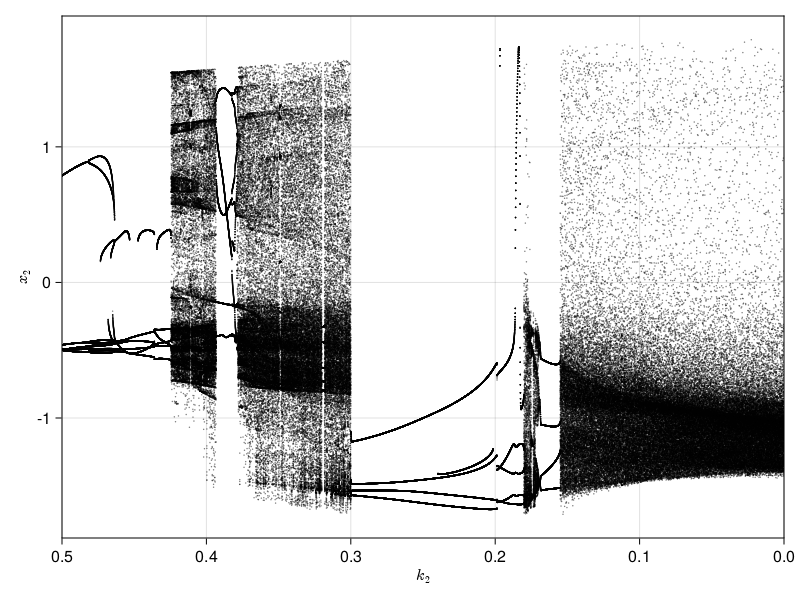

In [53]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.5, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

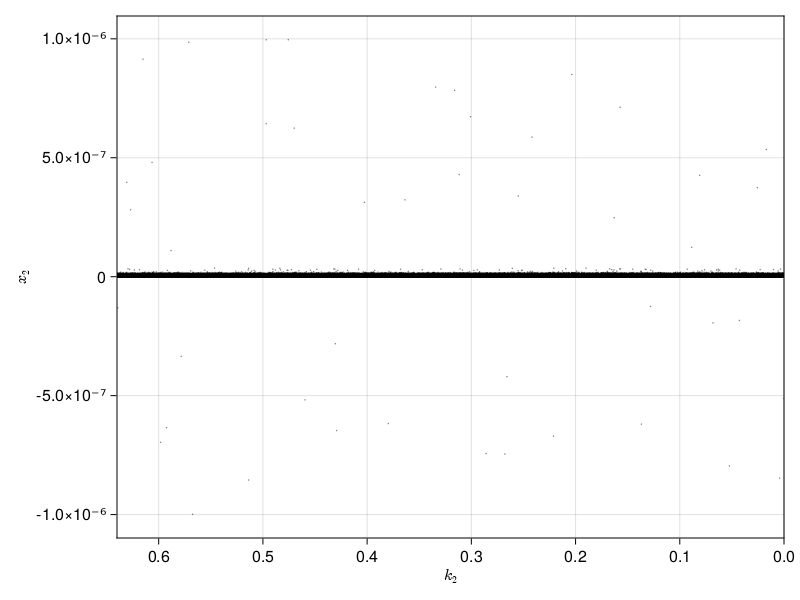

In [47]:
# from regular 
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.64, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

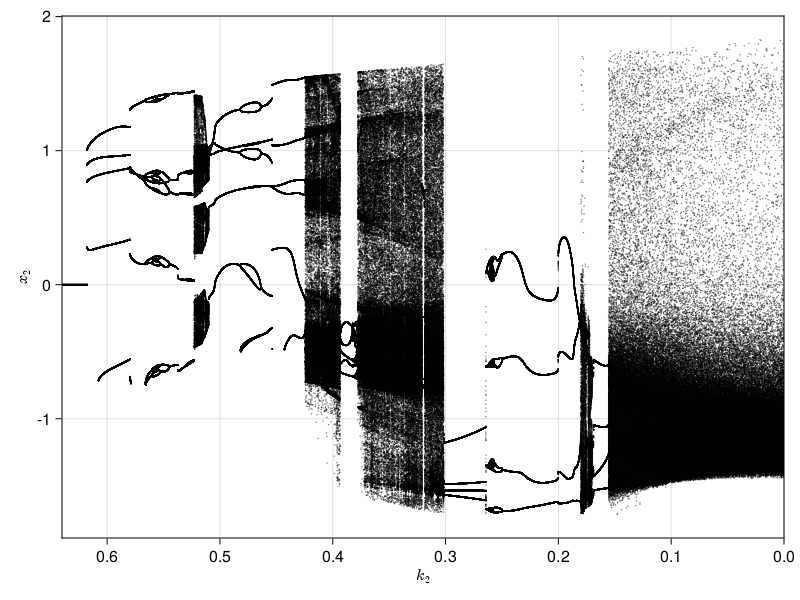

In [44]:
# from chaos 
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.64, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

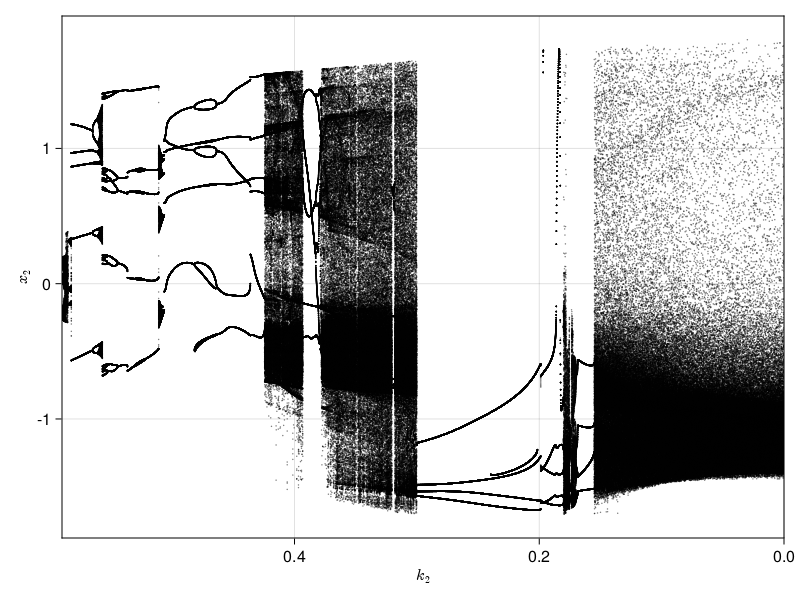

In [24]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.59, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

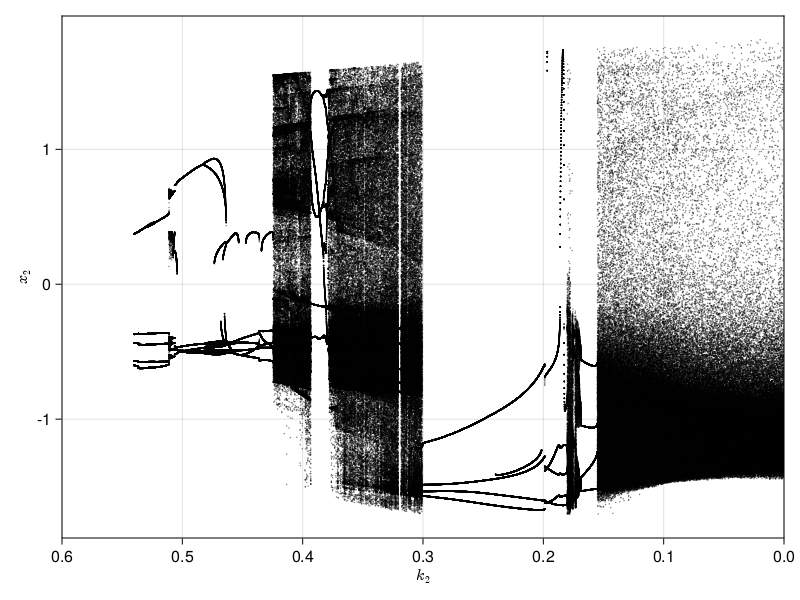

In [21]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.6, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

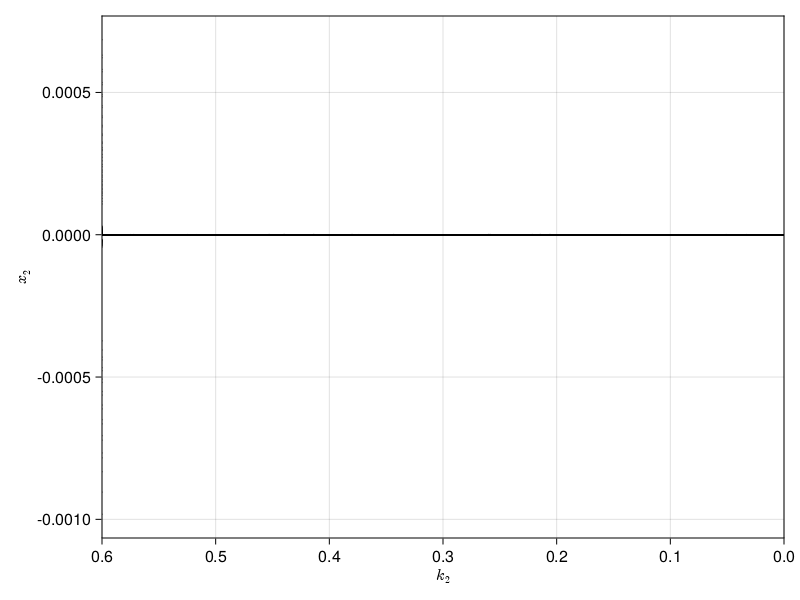

In [18]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.6, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

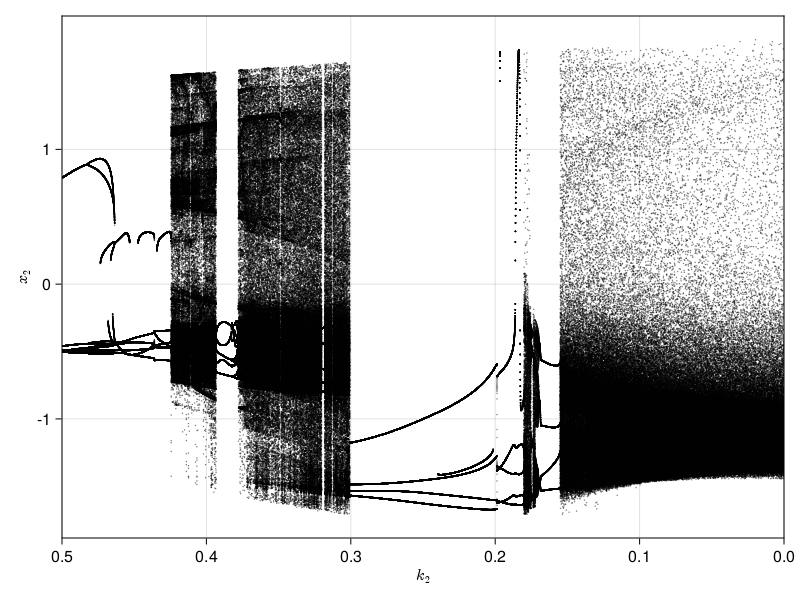

In [14]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.5, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

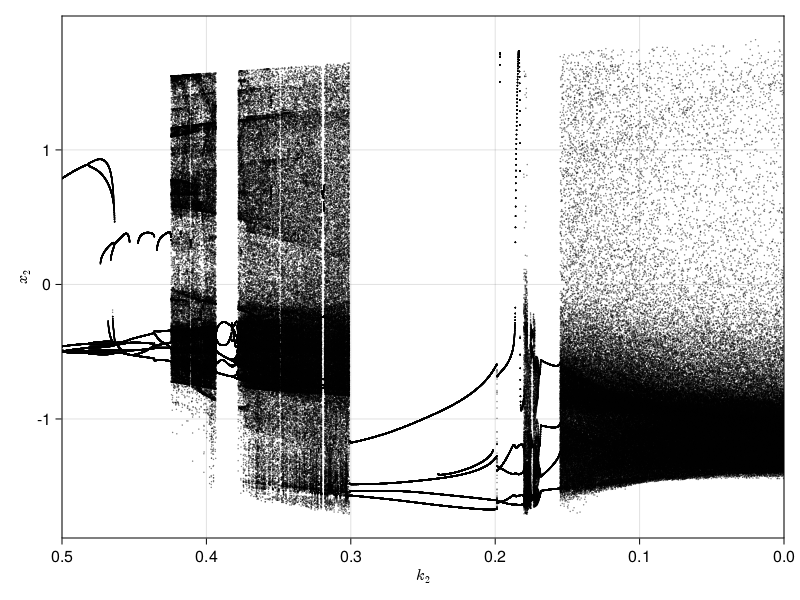

In [10]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.5, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

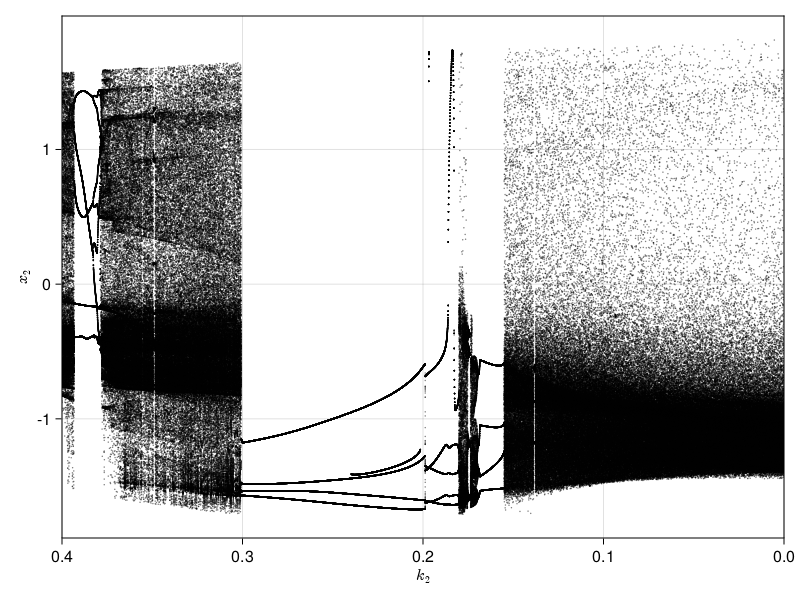

In [7]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.4, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

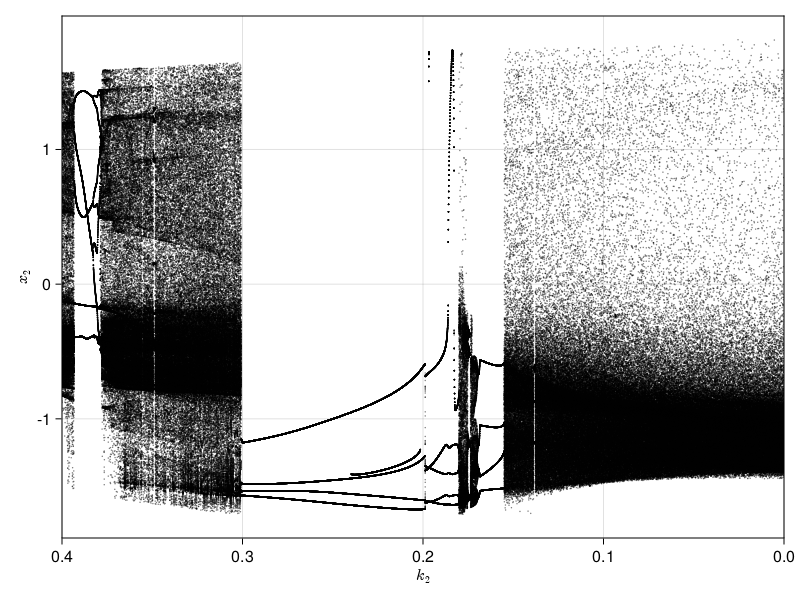

In [72]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.4, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

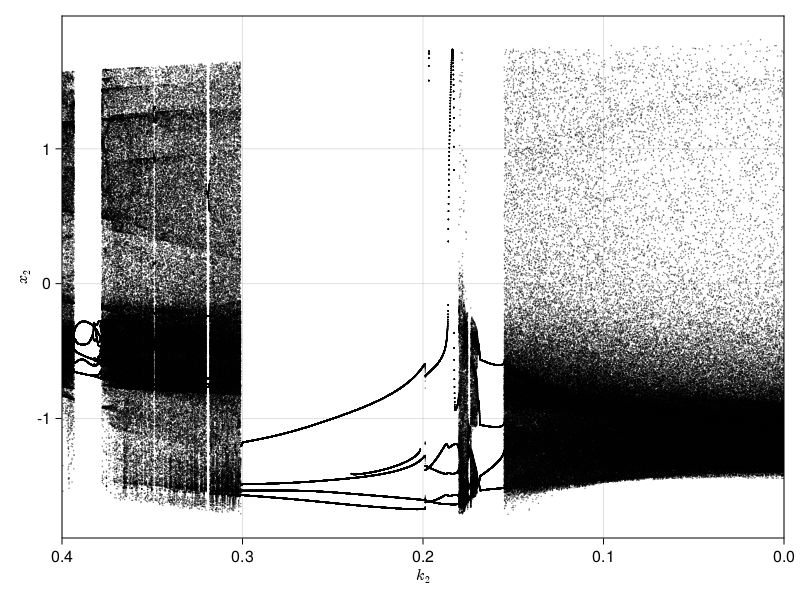

In [66]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.4, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

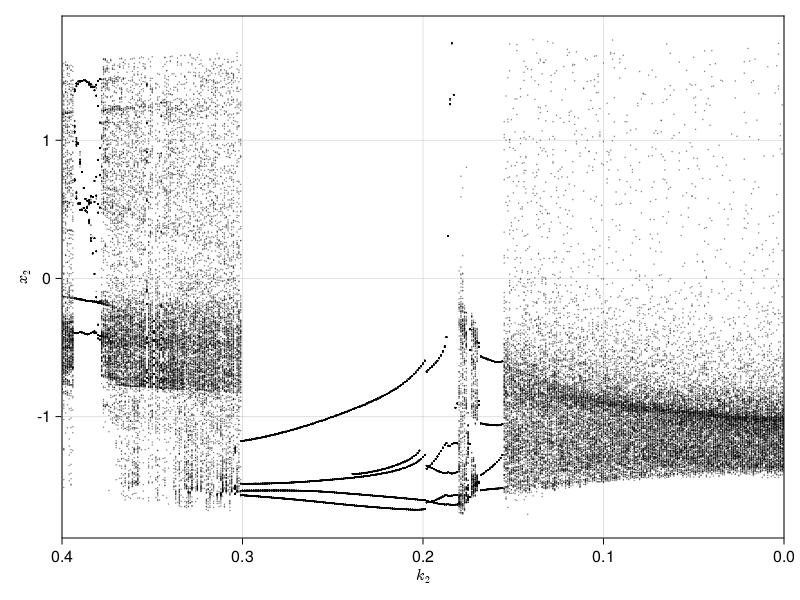

In [36]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.4, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

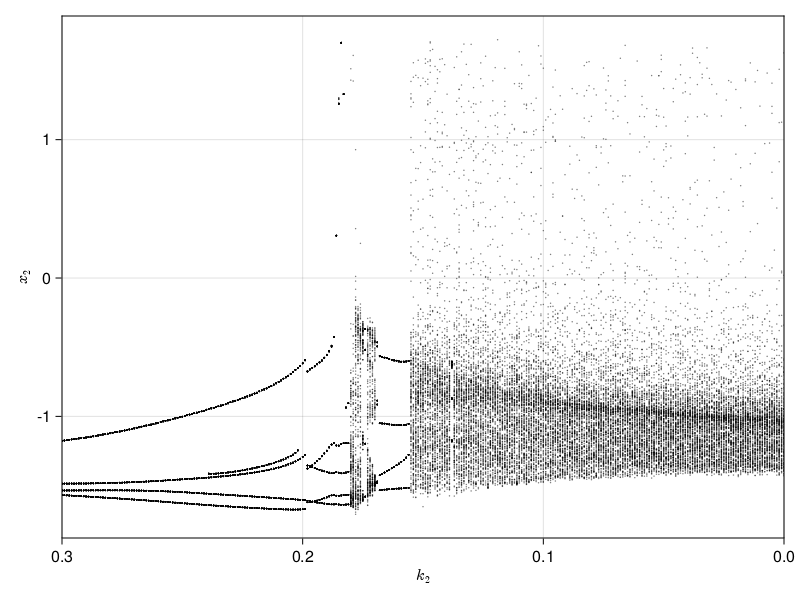

In [33]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.3, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

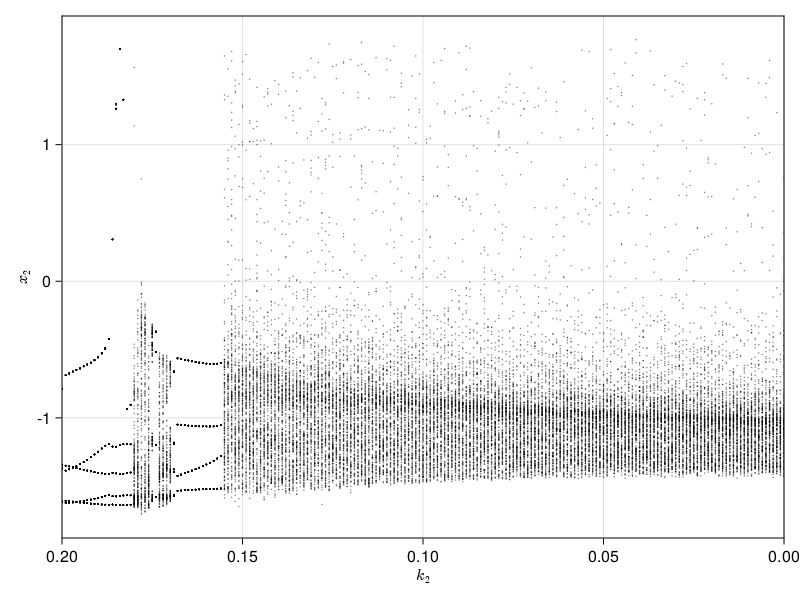

In [30]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.2, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

In [22]:
pvalues = range(0.6, stop = 0, length = 500)
i = 4
plane = (1, 0.0)
tf = 50000.0
p_index = 12

12

12

## с хаотической траектории

In [23]:
output = produce_orbitdiagram(ds_HR1, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = 25000.0, u0 = condition1;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

In [ ]:
fig = Figure(resolution = (1600, 600), fontsize = 20)
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
xlims!(ax, 0.6, 0)
for (j, p) in enumerate(pvalues)
    
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 0.8
    )
end
fig

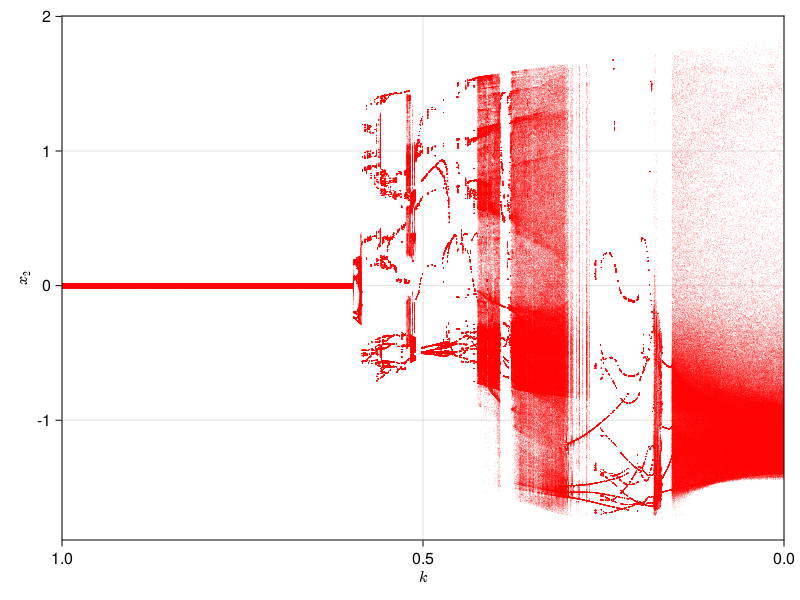

In [22]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
xlims!(ax, 1, 0)
for (j, p) in enumerate(pvalues)
    
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("red", 0.5), markersize = 0.6
    )
end
fig

## с квазипериодической траектории

In [23]:
output1 = produce_orbitdiagram(ds_HR2, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = 50000.0, u0 = condition2;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

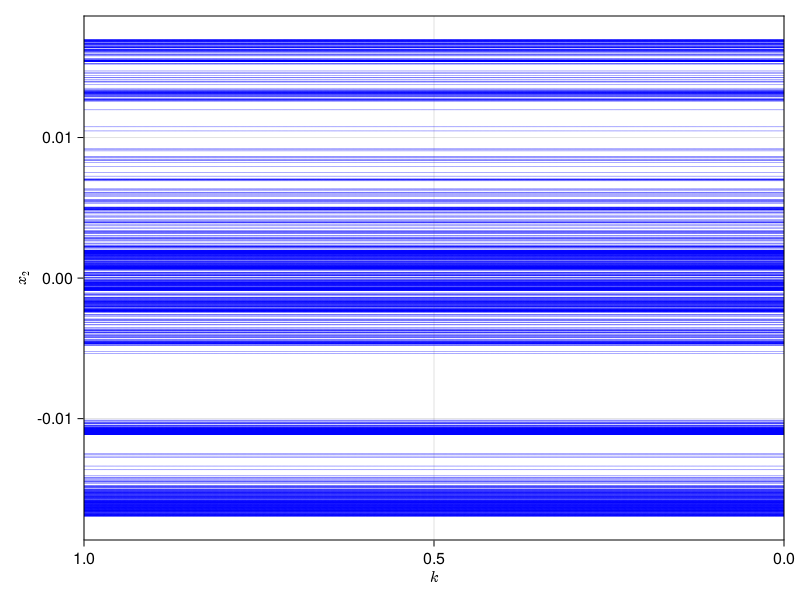

In [24]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
xlims!(ax, 1, 0)
for (j, p) in enumerate(pvalues)
    
    scatter!(ax, fill(p, length(output1[j])), output1[j];
        color = ("blue", 0.5), markersize = 0.6
    )
end
fig

## с обеих

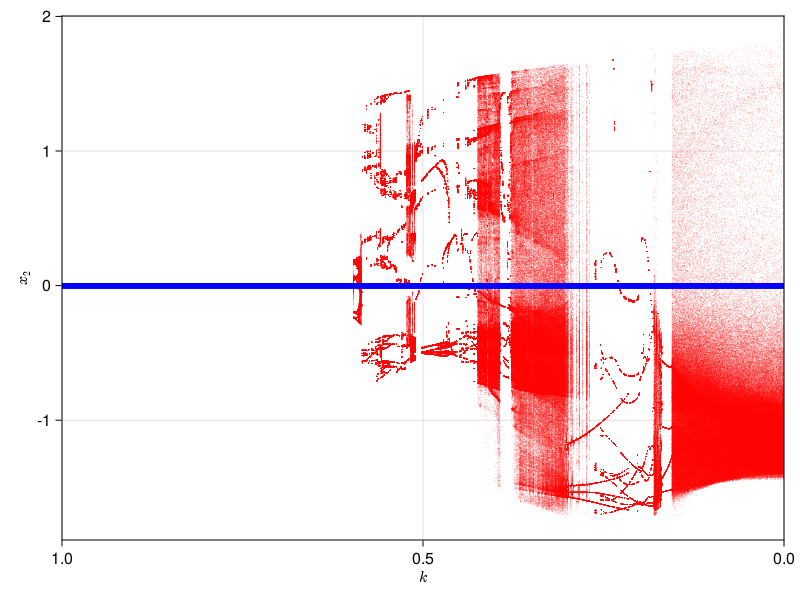

In [25]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
xlims!(ax, 1, 0)

for (j, p) in enumerate(pvalues)
    
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("red", 0.5), markersize = 0.6
    )
end

for (j, p) in enumerate(pvalues)
    
    scatter!(ax, fill(p, length(output1[j])), output1[j];
        color = ("blue", 0.5), markersize = 0.6
    )
end

fig

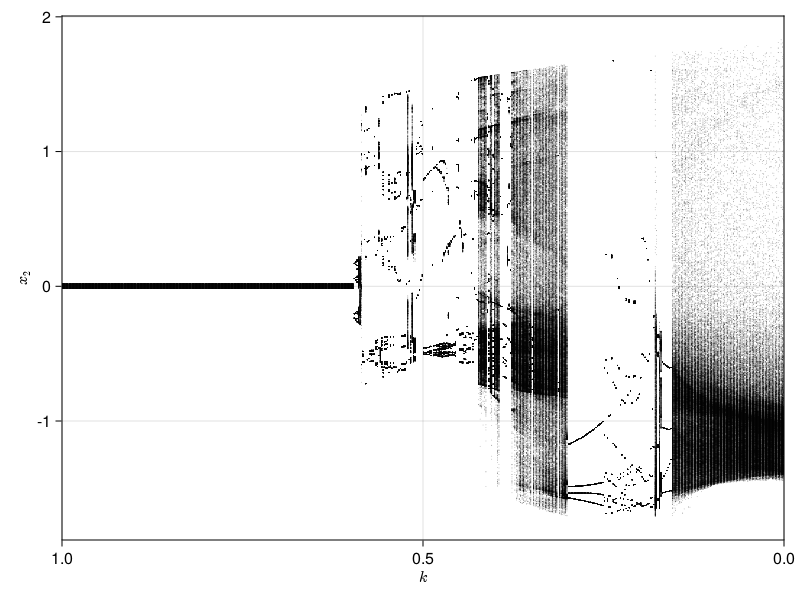

In [11]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
xlims!(ax, 1, 0)
for (j, p) in enumerate(pvalues)
    
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 0.7
    )
end
fig

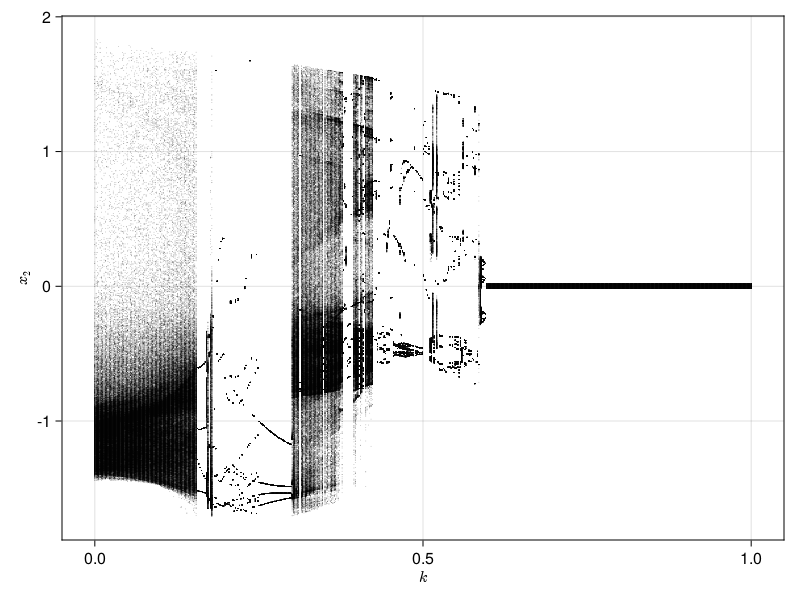

In [12]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
for (j, p) in enumerate(pvalues)
    
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 0.7
    )
end
fig

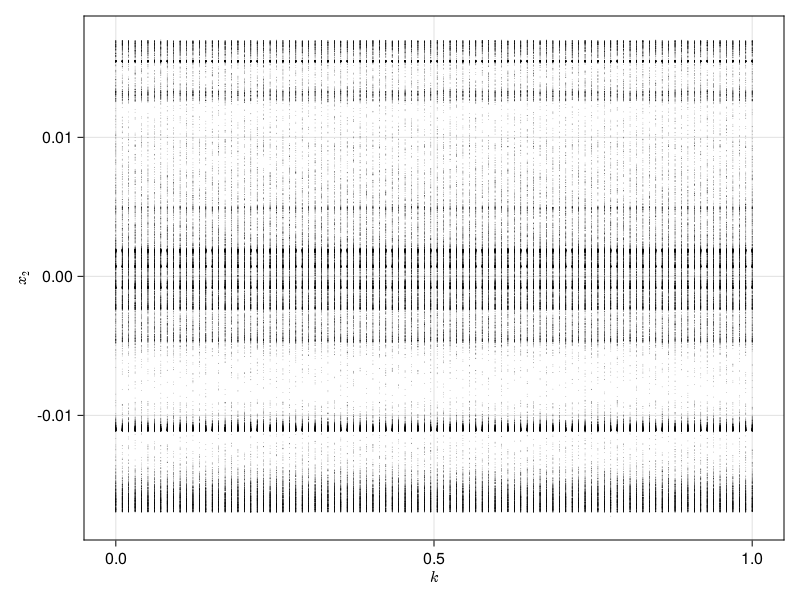

In [8]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
xlims!(ax, 1, 0)
for (j, p) in enumerate(pvalues)
    
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 0.7
    )
end
fig

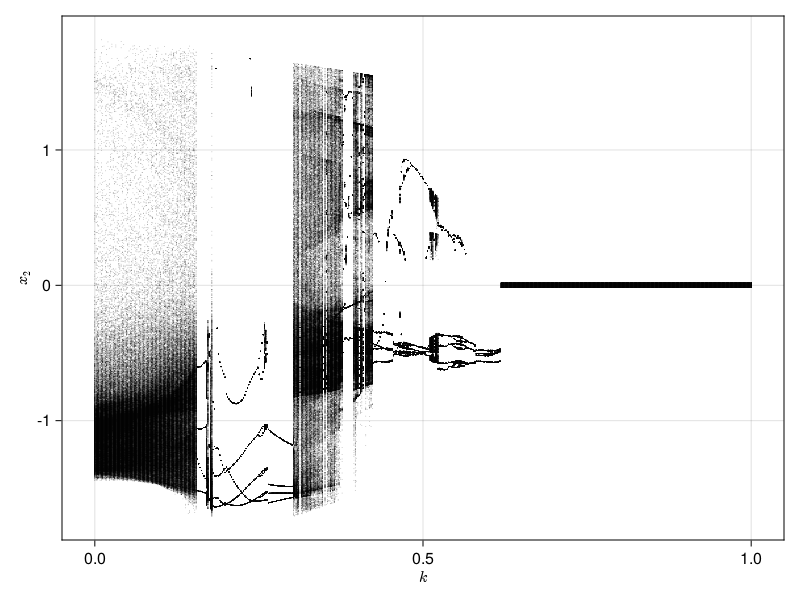

In [14]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 0.7
    )
end
fig

## y1 = 0, plot k in x1

In [16]:
pvalues = range(0, stop = 1, length = 500)
i = 1

plane = (2, 0.0)
tf = 100000.0
p_index = 12

12

In [17]:
output = produce_orbitdiagram(ds_HR, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = 50000.0;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

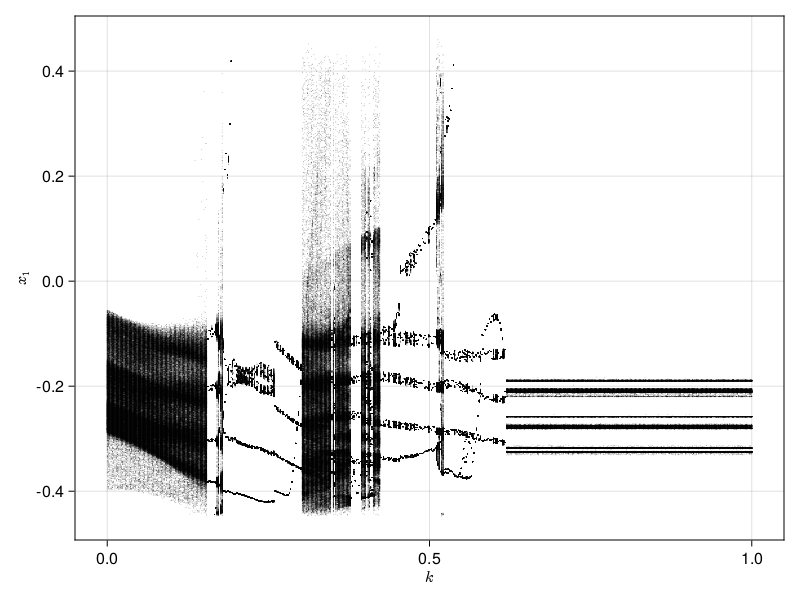

In [19]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_1")
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 0.7
    )
end
fig

In [6]:
pvalues = range(1, stop = 0, length = 100)
i = 1
plane = (2, 0.0)
tf = 100000.0
p_index = 12

12

In [7]:
output = produce_orbitdiagram(ds_HR, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = 50000.0;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

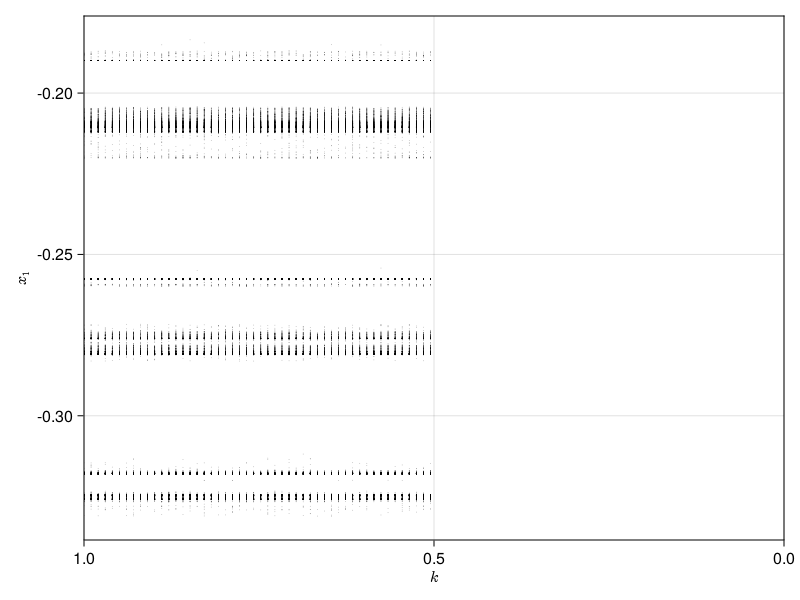

In [20]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_1")
xlims!(ax, 1, 0)
for (j, p) in enumerate(pvalues[1:50])
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 0.7
    )
end
fig